<a href="https://colab.research.google.com/github/tarunpanda001/Machine_learning_Models/blob/main/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
!gdown 1ZdhRqYv-JizWV6DxO6C4R_k1kxPhmlF2

Downloading...
From: https://drive.google.com/uc?id=1ZdhRqYv-JizWV6DxO6C4R_k1kxPhmlF2
To: /content/multiclass.csv
100% 14.6k/14.6k [00:00<00:00, 29.7MB/s]


In [5]:
df=pd.read_csv('multiclass.csv')
df.head()

,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,class
0,3,12669,9656,7561,214,2674,1338,2
1,3,7057,9810,9568,1762,3293,1776,2
2,3,6353,8808,7684,2405,3516,7844,2
3,3,13265,1196,4221,6404,507,1788,1
4,3,22615,5410,7198,3915,1777,5185,1


In [6]:
df.shape

(440, 8)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Region            440 non-null    int64
 1   Fresh             440 non-null    int64
 2   Milk              440 non-null    int64
 3   Grocery           440 non-null    int64
 4   Frozen            440 non-null    int64
 5   Detergents_Paper  440 non-null    int64
 6   Delicassen        440 non-null    int64
 7   class             440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


## Data Dictionary (Feature understanding)


1. Region	where the store is located (1: Tier-1 city, 2: Tier-2 city, 3:Tier-3 city)
2. Fresh	Fresh food products delivery count
3. Milk	milk products delivery count
4. Grocery	Grocery products delivery count
5. Frozen	Frozen food products delivery count
6. Detergents_Paper	washing products delivery count
7. Delicassen	imported products, cooked meat delivery count
8. class	Store catgeory (Class1, Class2, Class3)

1. Class 1: High Traffic
2. Class 2: Mod Traffic
3. Class 3: Low Traffic

In [8]:
df["class"].unique()

array([2, 1, 3])

In [9]:
df["class"].value_counts()

,count
class,
2,180
3,173
1,87


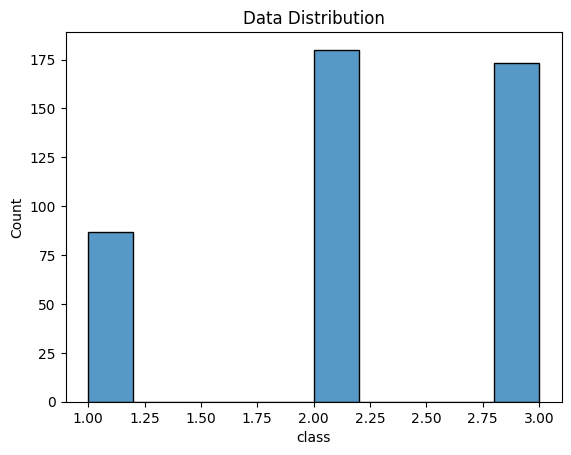

In [10]:
sns.histplot(data=df, x="class")
plt.title('Data Distribution')
plt.show()


In [11]:
X=df[['Region', 'Fresh',    'Milk', 'Grocery',  'Frozen',   'Detergents_Paper', 'Delicassen']].copy()
y=df[['class']].copy()

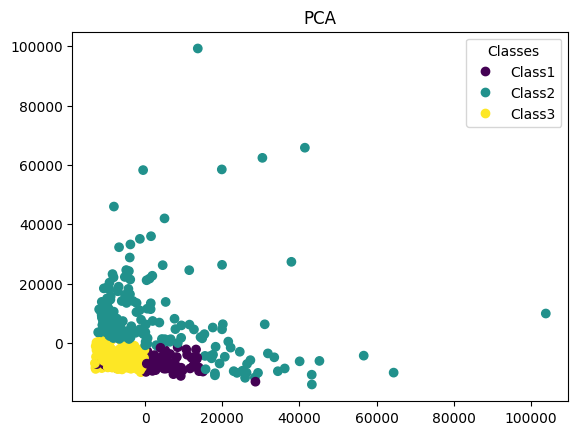

In [12]:
## Principal Component Analysis :  Helps to vizulize muti-dim data to a samaller dimension.

from sklearn.decomposition import PCA
# reducing features to just 2 features to vizulaize
pca = PCA(n_components=2)
visualize=pca.fit_transform(X)
scatter=plt.scatter(visualize[:,0] ,visualize[:,1],c = y.values[:,0] )
plt.legend(
    handles=scatter.legend_elements()[0],
    labels=['Class1', 'Class2', 'Class3'],
    title="Classes"
)
plt.title('PCA')
plt.show()

## What do we know about this data?

1. Muti-class classification
2. Highly Imbalanced data
3. Non Linear in Nature

In [13]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

X_train_val, X_test, y_train_val, y_test = train_test_split(X,y,test_size=0.25, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train_val,y_train_val,test_size=0.25, random_state=42)

print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)
print(X_test.shape, y_test.shape)

(247, 7) (247, 1)
(83, 7) (83, 1)
(110, 7) (110, 1)


## Making Imbalnced data into Balanced Data

In [14]:
## SMOTE

from imblearn.over_sampling import SMOTE
smt=SMOTE()
X_sm,y_sm=smt.fit_resample(X_train,y_train)

In [15]:
y_sm.value_counts()

,count
class,
1,99
2,99
3,99


## Standardization

In [16]:
from sklearn.preprocessing import StandardScaler
st=StandardScaler()
X_sm = st.fit_transform(X_sm.values)
X_val_scaled = st.transform(X_val.values)
X_test_scaled = st.transform(X_test.values)

y_sm = y_sm.values[:,0]
y_val = y_val.values[:,0]
y_test = y_test.values[:,0]

In [17]:
X_val_scaled[10]

array([ 0.69286827,  0.27350047,  6.51703978, 10.20249349, -0.4020979 ,
        8.66352921,  0.4077116 ])

## KNN from Scratch

In [18]:
def knn(X,Y,queryPoint,k):
    """Predict the class label for the query point"""
    # Euclidean Distance
    dist = np.sqrt(np.sum((queryPoint-X)**2,axis=1) )

    # Storing distance and Class labels together
    distances = [(dist[i],Y[i]) for i in range(len(dist)) ]
    # sort the distances
    distances = sorted(distances)
    # Nearest/First K points
    distances = distances[:k]

    distances = np.array(distances)

    classes_counts = np.unique(distances[:,1],return_counts=True)

    index = classes_counts[1].argmax()
    pred = classes_counts[0][index]

    return int(pred),distances

In [19]:
pred,neighbors = knn(X_sm, y_sm, X_val_scaled[50],5)

print(f'k nearest neighbors with the distance and class label :{neighbors}')

print(f'The predicted class label: {pred}')

k nearest neighbors with the distance and class label :[[0.2035329  3.        ]
 [0.21507497 3.        ]
 [0.22926965 3.        ]
 [0.28333619 3.        ]
 [0.29298929 1.        ]]
The predicted class label: 3


In [20]:
from sklearn.metrics import confusion_matrix

y_pred = []

for i in range(X_test_scaled.shape[0]):
    output,_ = knn(X_sm, y_sm, X_test_scaled[i],5)
    y_pred.append(output)




cm = confusion_matrix(y_test,y_pred)

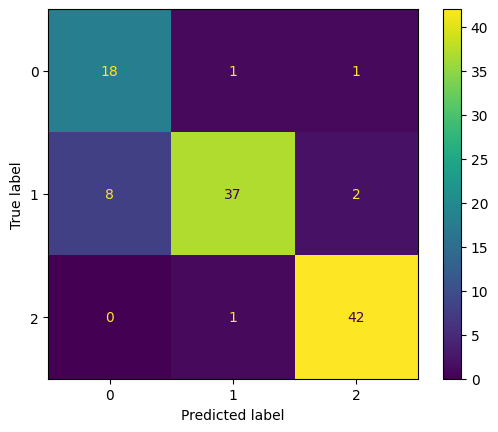

In [21]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay(cm).plot()

In [22]:
from sklearn.metrics import classification_report

print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           1       0.90      0.69      0.78        26
           2       0.79      0.95      0.86        39
           3       0.98      0.93      0.95        45

    accuracy                           0.88       110
   macro avg       0.89      0.86      0.87       110
weighted avg       0.89      0.88      0.88       110



## KNN using sklearn

In [34]:
df

,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,class
0,3,12669,9656,7561,214,2674,1338,2
1,3,7057,9810,9568,1762,3293,1776,2
2,3,6353,8808,7684,2405,3516,7844,2
3,3,13265,1196,4221,6404,507,1788,1
4,3,22615,5410,7198,3915,1777,5185,1
...,...,...,...,...,...,...,...,...
435,3,29703,12051,16027,13135,182,2204,2
436,3,39228,1431,764,4510,93,2346,2
437,3,14531,15488,30243,437,14841,1867,2
438,3,10290,1981,2232,1038,168,2125,3


In [35]:
X=df[['Region', 'Fresh',    'Milk', 'Grocery',  'Frozen',   'Detergents_Paper', 'Delicassen']].copy()
y=df[['class']].copy()

In [37]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X=scaler.fit_transform(X)

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=42)

In [40]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((330, 7), (110, 7), (330, 1), (110, 1))

In [42]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5,metric="euclidean")
knn.fit(X_train,y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(metric='euclidean')

In [43]:
knn.score(X_train,y_train)

0.9212121212121213

In [45]:
y_pred=knn.predict(X_test)
y_pred

array([2, 3, 2, 1, 3, 3, 3, 2, 3, 3, 3, 1, 2, 3, 2, 3, 1, 2, 1, 3, 2, 2,
       2, 3, 1, 1, 1, 1, 3, 3, 2, 2, 1, 2, 1, 3, 3, 2, 2, 3, 3, 3, 3, 3,
       2, 2, 2, 2, 2, 1, 2, 3, 3, 1, 2, 3, 2, 3, 2, 2, 1, 3, 2, 2, 2, 2,
       2, 2, 3, 1, 2, 3, 3, 3, 3, 2, 2, 1, 2, 3, 3, 3, 1, 2, 3, 2, 3, 3,
       2, 1, 3, 3, 2, 3, 2, 3, 3, 3, 3, 3, 1, 3, 2, 2, 2, 3, 2, 2, 1, 3])

In [47]:
np.array(y_test)

array([[2],
       [3],
       [2],
       [2],
       [3],
       [3],
       [3],
       [2],
       [3],
       [3],
       [3],
       [1],
       [2],
       [3],
       [3],
       [3],
       [1],
       [2],
       [1],
       [3],
       [2],
       [2],
       [2],
       [3],
       [1],
       [1],
       [1],
       [1],
       [1],
       [3],
       [2],
       [2],
       [1],
       [2],
       [1],
       [3],
       [3],
       [2],
       [2],
       [3],
       [2],
       [3],
       [3],
       [3],
       [2],
       [2],
       [2],
       [2],
       [2],
       [1],
       [2],
       [3],
       [3],
       [1],
       [2],
       [3],
       [2],
       [3],
       [2],
       [2],
       [1],
       [1],
       [1],
       [2],
       [2],
       [2],
       [2],
       [2],
       [3],
       [1],
       [2],
       [3],
       [3],
       [3],
       [3],
       [2],
       [2],
       [2],
       [2],
       [3],
       [3],
       [3],
       [2],
    

In [49]:
knn.score(X_test,y_test)

0.9090909090909091

In [51]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[16,  1,  3],
       [ 3, 42,  2],
       [ 0,  1, 42]])

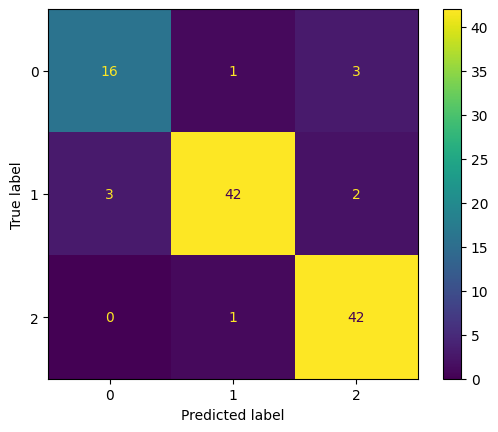

In [52]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay(cm).plot()

In [55]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))

0.9090909090909091


In [56]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.84      0.80      0.82        20
           2       0.95      0.89      0.92        47
           3       0.89      0.98      0.93        43

    accuracy                           0.91       110
   macro avg       0.90      0.89      0.89       110
weighted avg       0.91      0.91      0.91       110

